# Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

- **CRIM**: Per capita crime rate by town  

- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.  

- **INDUS**: Proportion of non-retail business acres per town  

- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  

- **NOX**: Nitric oxides concentration (parts per 10 million)  

- **RM**: Average number of rooms per dwelling  

- **AGE**: Proportion of owner-occupied units built prior to 1940  

- **DIS**: Weighted distances to five Boston employment centres  

- **RAD**: Index of accessibility to radial highways  

- **TAX**: Full-value property-tax rate per $10,000  

- **PTRATIO**: Pupil-teacher ratio by town  

- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  

- **LSTAT**: Percentage of lower status of the population  

- **MEDV**: Median value of owner-occupied homes in $1000's  

# Load the Dataset

In [2]:
# Fetch the dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Column names
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", 
    "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Create a DataFrame for the features
df = pd.DataFrame(data, columns=feature_names)

# Add the target variable (MEDV) to the DataFrame
df["MEDV"] = target

# Display the dataset
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Handling Missing Values

In [3]:
# Datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
# Checking missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Visualizing Key Features

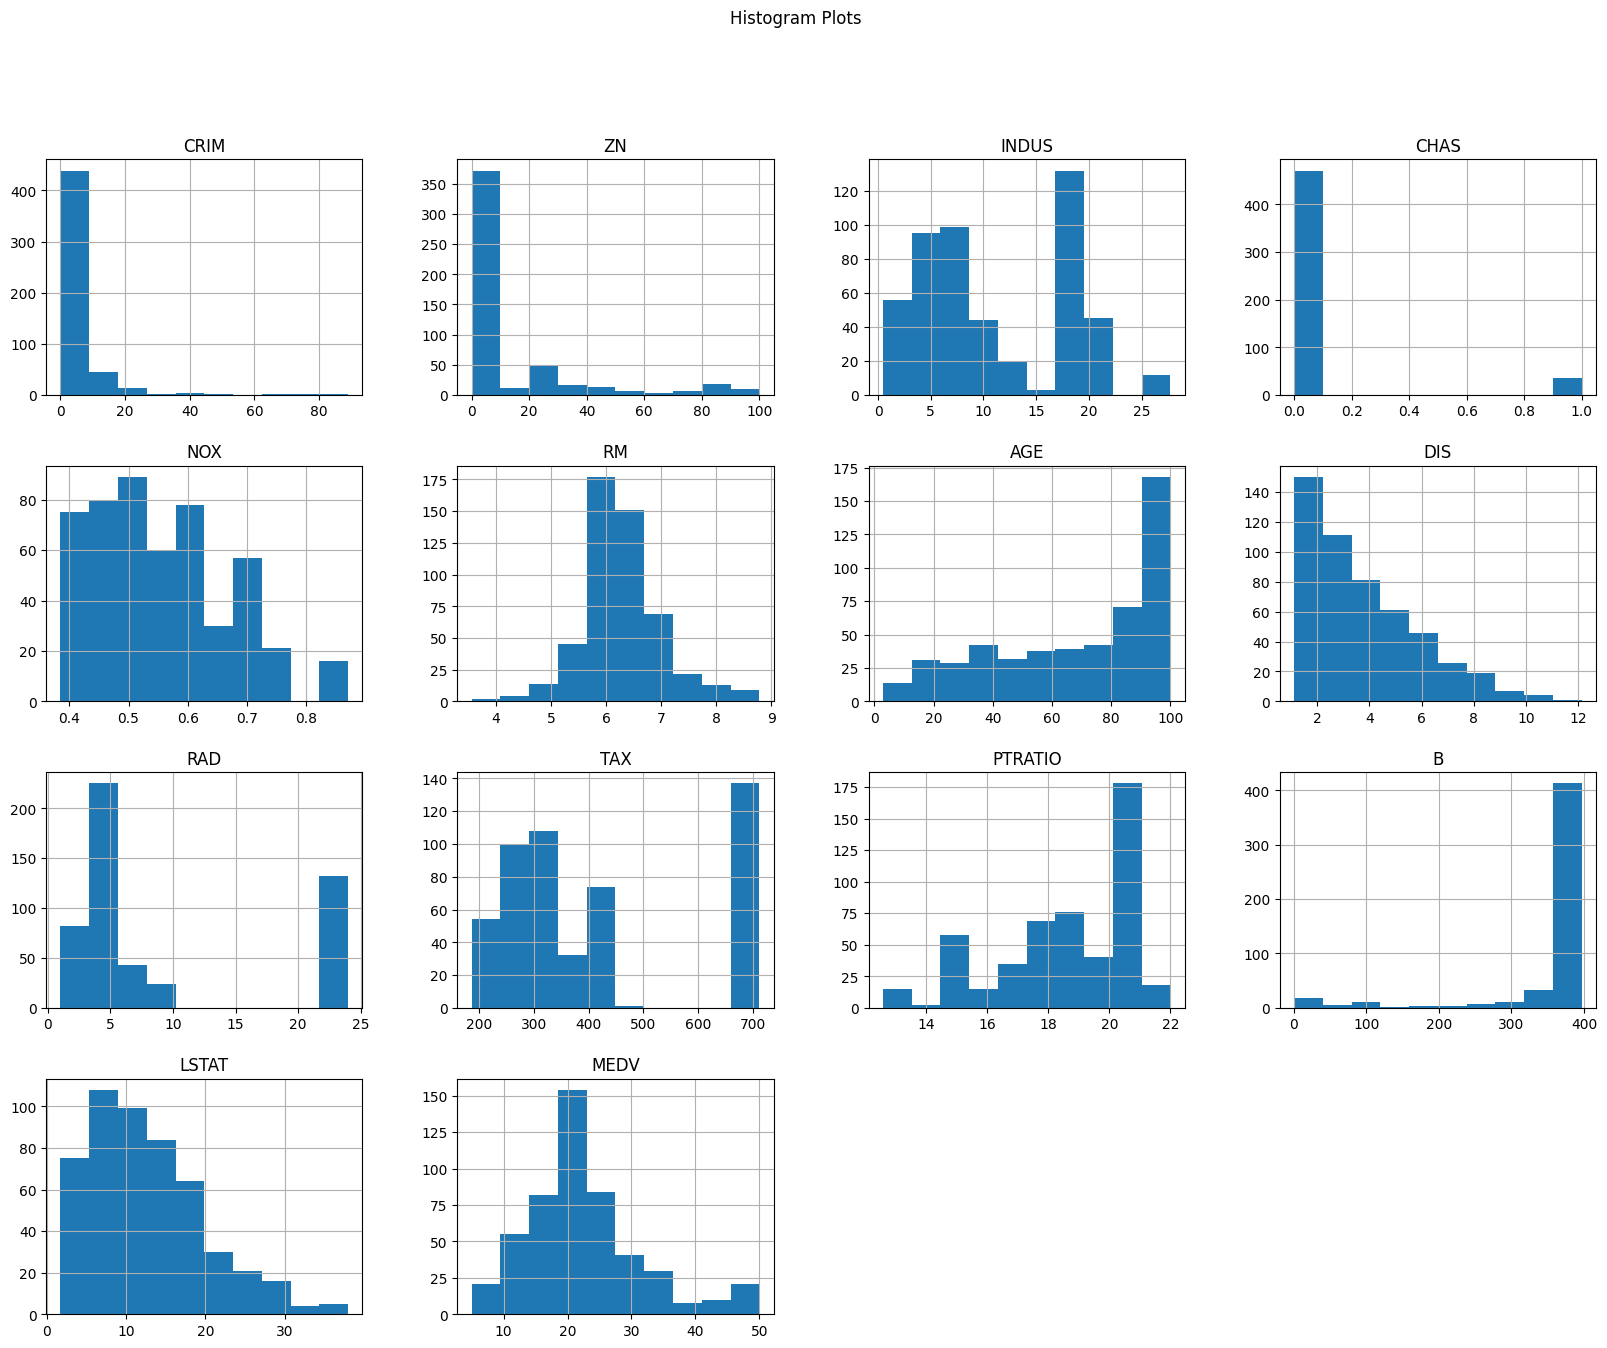

In [5]:
# Plot histograms for all numerical features
df.hist(figsize=(20, 15))
plt.suptitle("Histogram Plots")
plt.show()

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

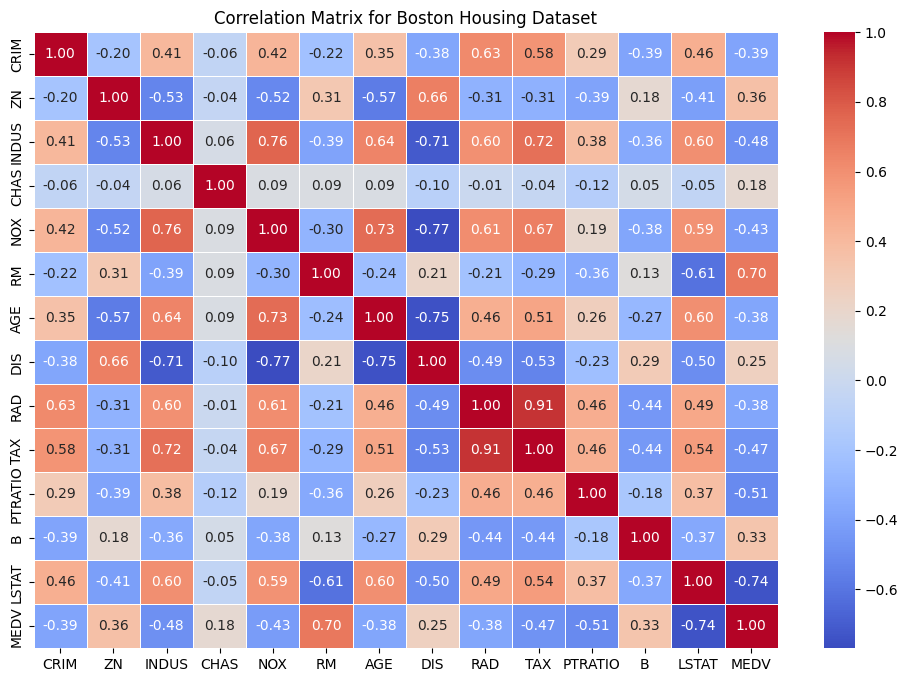

In [6]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Boston Housing Dataset")
plt.show()

# Apply Feature Scaling

In [7]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the entire dataset (excluding the target variable if it exists)
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


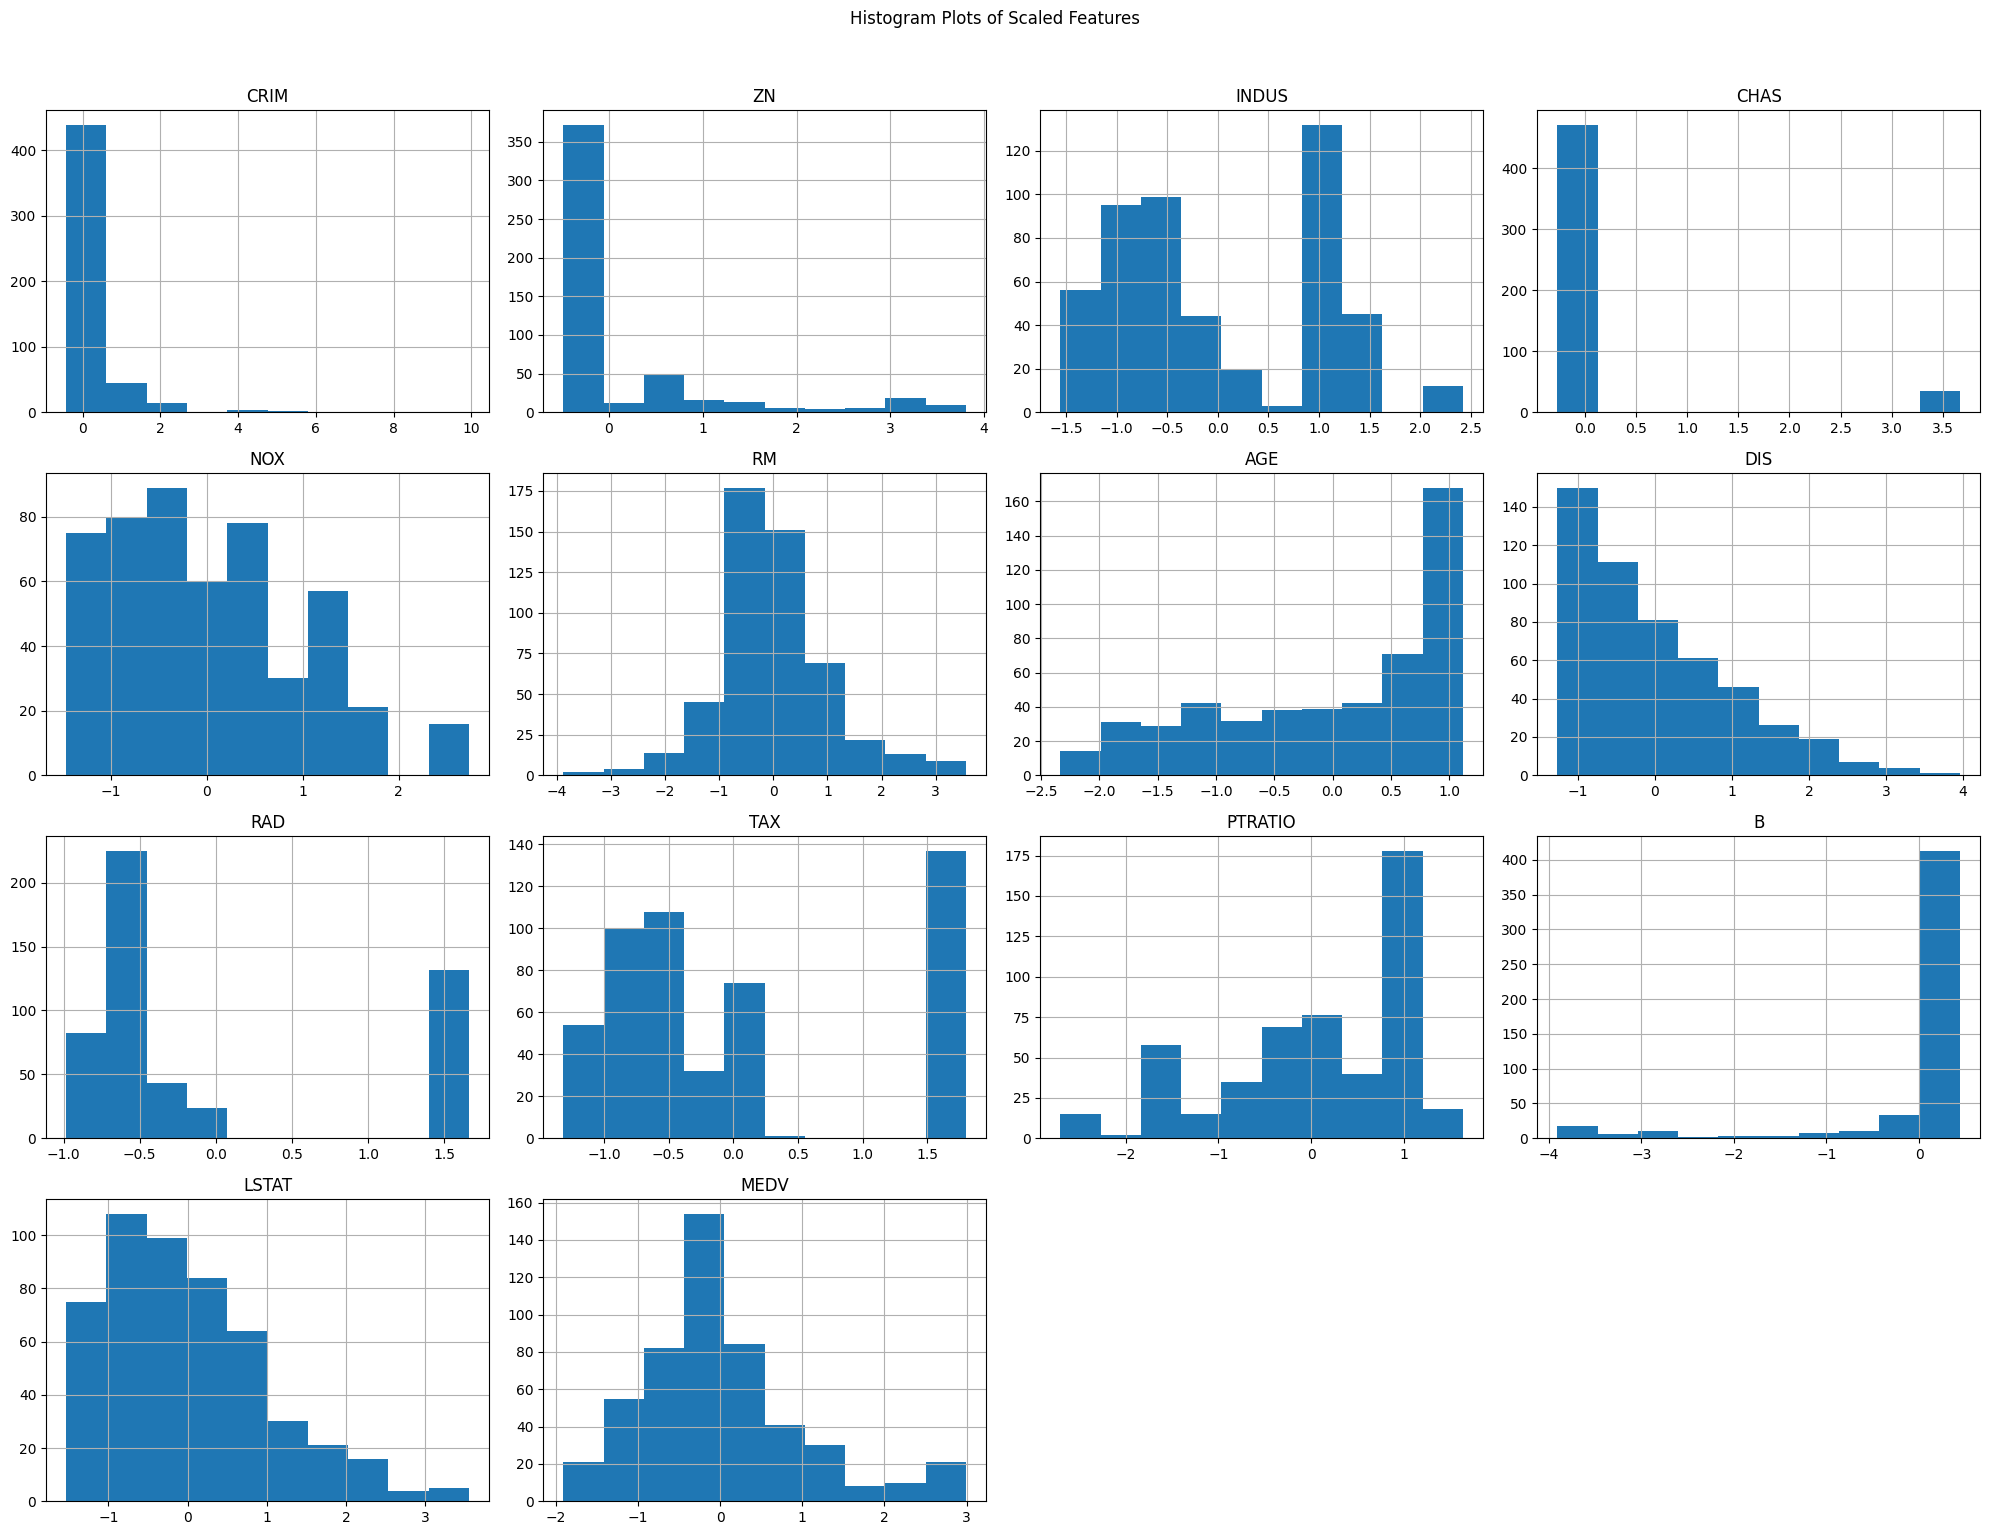

In [8]:
# Plot histograms for all scaled features
df.hist(figsize=(20, 15))
plt.suptitle("Histogram Plots of Scaled Features", y=1.02)
plt.tight_layout()
plt.show()

# Train and Evaluate Regression Models

## Spliting the Data into Training and Testing Sets

In [9]:
# Features (X) and target (y)
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train Linear Regression

In [10]:
# Initialize and train the Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set 
y_pred_lr = model.predict(X_test)

# Evaluation metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Display metrics for Linear Regression
print(f"Mean Squared Error: {mse_lr}")
print(f"Mean Absolute Error: {mae_lr}")
print(f"R-squared: {r2_lr}")

Mean Squared Error: 0.2548869623452261
Mean Absolute Error: 0.3442213645326507
R-squared: 0.7112260057484923


## Train Decision Tree

In [11]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluation Metrics for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Display metrics for Decision Tree
print(f"Mean Squared Error: {mse_dt}")
print(f"Mean Absolute Error: {mae_dt}")
print(f"R-squared: {r2_dt}")

Mean Squared Error: 0.11943790273180328
Mean Absolute Error: 0.24903733342746462
R-squared: 0.8646829170094197


## Random Forest

In [12]:
# Initialize and train the Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display results for Random Forest
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared: {r2_rf}")

Mean Squared Error: 0.1139353071392339
Mean Absolute Error: 0.23043686531232596
R-squared: 0.8709170785898963


## Support Vector Machine  

In [13]:
# Initialize the SVM model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Display results for SVM
print(f"Mean Squared Error: {mse_svr}")
print(f"Mean Absolute Error: {mae_svr}")
print(f"R-squared: {r2_svr}")

Mean Squared Error: 0.1575036017907976
Mean Absolute Error: 0.2379716741138989
R-squared: 0.8215564115965879


## Compare performance

In [14]:
import pandas as pd

# Create a dictionary with the model names and evaluation metrics
model_metrics = {
    "Model": ["Random Forest", "Decision Tree", "Support Vector Machine", "Linear Regression"],
    "R² Score": [r2_rf, r2_dt, r2_svr, r2_lr],
    "MSE": [mse_rf, mse_dt, mse_svr, mse_lr],
    "MAE": [mae_rf, mae_dt, mae_svr, mae_lr]
}

# Create DataFrame
comparison_df = pd.DataFrame(model_metrics)

# Display the comparison table
print("\nModel Performance Comparison (Ranked by R² Score):")
print(comparison_df)


Model Performance Comparison (Ranked by R² Score):
                    Model  R² Score       MSE       MAE
0           Random Forest  0.870917  0.113935  0.230437
1           Decision Tree  0.864683  0.119438  0.249037
2  Support Vector Machine  0.821556  0.157504  0.237972
3       Linear Regression  0.711226  0.254887  0.344221


# Tune hyperparameters using GridSearchCV and RandomizedSearchCV